In [14]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

terran_data = read_csv('../Output/TerranMarch.csv', header=0, index_col=False)
protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)
zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(solver='liblinear', random_state=0)

TERRAN LOGISTIC REGRESSION

In [16]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(terran_data) if x not in no_normalize]

#Normalizing these columns
norm = terran_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))

In [17]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(terran_data) if x not in no_standardize]

#Standardizing these columns
stand = terran_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
terran_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))
terran_data_standardized = terran_data_standardized.join(terran_data['win'])

In [18]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_normalized) if x not in no_X]

Y = terran_data_normalized['win']
X_normalized = terran_data_normalized[yes_X]

In [19]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_standardized) if x not in no_X]

Y = terran_data_standardized['win']
X_standardized = terran_data_standardized[yes_X]

In [20]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]

X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [21]:
log_normT = log_model.fit(X_normalized_train, Y_train)
log_standT = log_model.fit(X_standardized_train, Y_train)

In [22]:
log_normprobT = log_normT.predict_proba(X_normalized_val)
log_standprobT = log_standT.predict_proba(X_standardized_val)

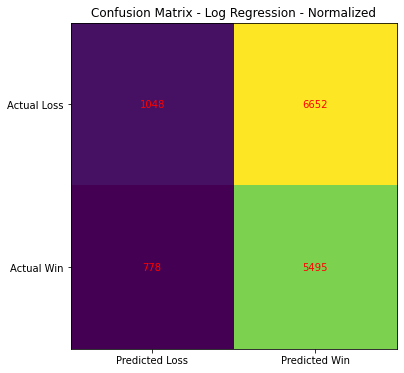

In [23]:
log_norm_cmT = confusion_matrix(Y_test, log_normT.predict(X_normalized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_norm_cmT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_norm_cmT[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Normalized')
plt.show()

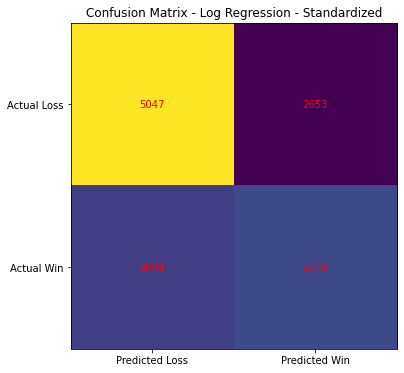

In [24]:
log_stand_cmT = confusion_matrix(Y_test, log_standT.predict(X_standardized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_stand_cmT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_stand_cmT[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Standardized')
plt.show()

In [25]:
#Normalized
print(classification_report(Y_test, log_normT.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.57      0.14      0.22      7700
           1       0.45      0.88      0.60      6273

    accuracy                           0.47     13973
   macro avg       0.51      0.51      0.41     13973
weighted avg       0.52      0.47      0.39     13973



In [26]:
#Standardized
print(classification_report(Y_test, log_standT.predict(X_standardized_test)))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      7700
           1       0.55      0.51      0.53      6273

    accuracy                           0.59     13973
   macro avg       0.58      0.58      0.58     13973
weighted avg       0.59      0.59      0.59     13973



PROTOSS LOGISTIC REGRESSION 

In [27]:
no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(protoss_data) if x not in no_normalize]

#Normalizing these columns
norm = protoss_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
protoss_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))

In [28]:
no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(protoss_data) if x not in no_standardize]

#Standardizing these columns
stand = protoss_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(protoss_data['win'])

In [29]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_normalized) if x not in no_X]

Y = protoss_data_normalized['win']
X_normalized = protoss_data_normalized[yes_X]

In [30]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y = protoss_data_standardized['win']
X_standardized = protoss_data_standardized[yes_X]

In [31]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]

X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [32]:
log_normP = log_model.fit(X_normalized_train, Y_train)
log_standP = log_model.fit(X_standardized_train, Y_train)

In [33]:
log_normprobP = log_normP.predict_proba(X_normalized_val)
log_standprobP = log_standP.predict_proba(X_standardized_val)

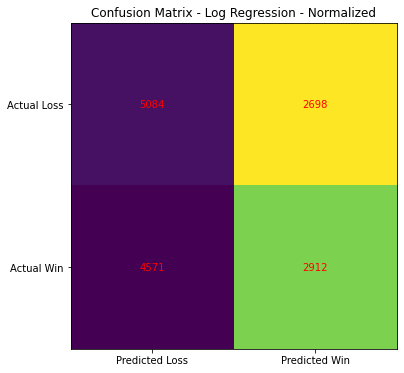

In [34]:
log_norm_cmP = confusion_matrix(Y_test, log_normP.predict(X_normalized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_norm_cmT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_norm_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Normalized')
plt.show()

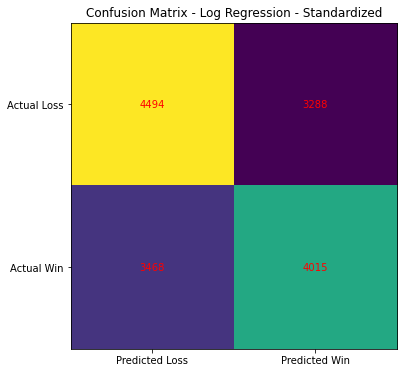

In [35]:
log_stand_cmP = confusion_matrix(Y_test, log_standP.predict(X_standardized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_stand_cmP)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_stand_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Standardized')
plt.show()

In [36]:
#Normalized
print(classification_report(Y_test, log_normP.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58      7782
           1       0.52      0.39      0.44      7483

    accuracy                           0.52     15265
   macro avg       0.52      0.52      0.51     15265
weighted avg       0.52      0.52      0.52     15265



In [37]:
#Standardized
print(classification_report(Y_test, log_standP.predict(X_standardized_test)))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      7782
           1       0.55      0.54      0.54      7483

    accuracy                           0.56     15265
   macro avg       0.56      0.56      0.56     15265
weighted avg       0.56      0.56      0.56     15265



ZERG LOGISTIC REGRESSION

In [38]:
no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(zerg_data) if x not in no_normalize]

#Normalizing these columns
norm = zerg_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))

In [39]:
no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(zerg_data) if x not in no_standardize]

#Standardizing these columns
stand = zerg_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(zerg_data['win'])

In [40]:
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [41]:
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y = zerg_data_standardized['win']
X_standardized = zerg_data_standardized[yes_X]

In [ ]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoP)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)+1]
Y_test = Y[(num_val + num_train)+1:]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train)+1:]

X_train = protoss_data_normalized[0:num_train]
X_val = protoss_data_normalized[num_train:(num_train + num_val)]
X_test = protoss_data_normalized[(num_val + num_train)+1:]

Y_Time = []
timer = 0;
for i in Y_test:
    Y_Time.append(timer)
    timer += 21
    
Y_Time.pop(0)

Y_demo_test = Y_test
Y_demo_test.pop((num_val + num_train)+1)

In [43]:
log_normZ = log_model.fit(X_normalized_train, Y_train)
log_standZ = log_model.fit(X_standardized_train, Y_train)

In [44]:
log_normprobZ = log_normZ.predict_proba(X_normalized_val)
log_standprobZ = log_standZ.predict_proba(X_standardized_val)

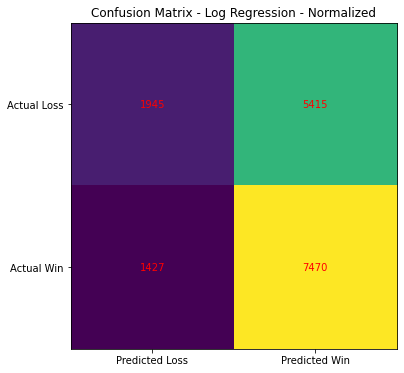

In [45]:
log_norm_cmZ = confusion_matrix(Y_test, log_normZ.predict(X_normalized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_norm_cmZ)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_norm_cmZ[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Normalized')
plt.show()

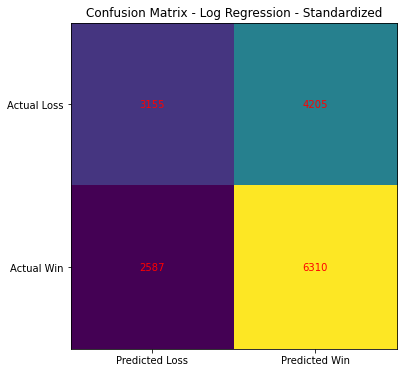

In [46]:
log_stand_cmZ = confusion_matrix(Y_test, log_standZ.predict(X_standardized_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(log_stand_cmZ)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_stand_cmZ[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - Log Regression - Standardized')
plt.show()

In [47]:
#Normalized
print(classification_report(Y_test, log_normZ.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.58      0.26      0.36      7360
           1       0.58      0.84      0.69      8897

    accuracy                           0.58     16257
   macro avg       0.58      0.55      0.52     16257
weighted avg       0.58      0.58      0.54     16257



In [48]:
#Standardized
print(classification_report(Y_test, log_standZ.predict(X_standardized_test)))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      7360
           1       0.60      0.71      0.65      8897

    accuracy                           0.58     16257
   macro avg       0.57      0.57      0.57     16257
weighted avg       0.58      0.58      0.57     16257

